# Figure 7

The code in this notebook was last tested with:

* python version 3.7.12
* numpy 1.20.3
* pandas 1.3.5
* matplotlib 3.4.2
* scipy 1.7.0
* seaborn 0.11.1

Below we generate Figure 7.

In [47]:
import numpy as np
from scipy.stats import t
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
sns.set_style('ticks')
sns.set_context('talk')

In [52]:
red = sns.xkcd_rgb['pale red']
blu = sns.xkcd_rgb['sky blue'] 

In [43]:
nodel_data = pd.read_csv('data/Figure_7_nodel.csv', nrows=1001)
del_data = pd.read_csv('data/Figure_7_del.csv', nrows=1001)

## Figure 7A

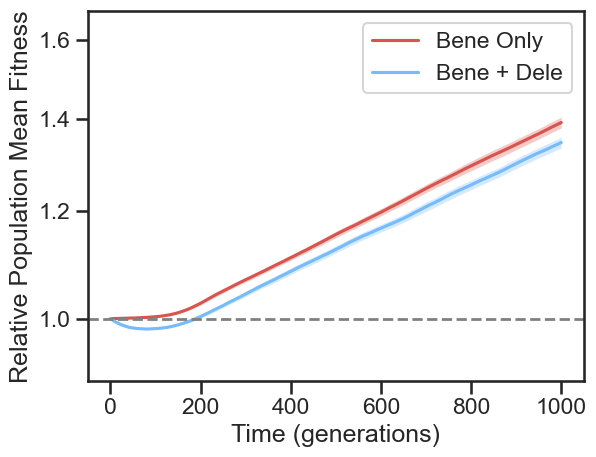

In [60]:
nReps = 100
w1 = nodel_data['par_fitness_mean'] / nodel_data['par_fitness_mean'][0]
w2 = del_data['par_fitness_mean'] / del_data['par_fitness_mean'][0]
rv = t(nReps-1)
tq = rv.ppf(.975)
w1ci = tq * (nodel_data['par_fitness_std'] / nodel_data['par_fitness_mean'][0]) / np.sqrt(nReps)
w2ci = tq * (del_data['par_fitness_std'] / del_data['par_fitness_mean'][0]) / np.sqrt(nReps) 
plt.semilogy(nodel_data['generation'], w1, label='Bene Only', color=red)
plt.fill_between(nodel_data['generation'], w1 - w1ci, w1 + w1ci, alpha=.3, color=red, lw=.001)
plt.plot(del_data['generation'], w2, label='Bene + Dele', color=blu)
plt.fill_between(del_data['generation'], w2 - w2ci, w2 + w2ci, alpha=.3, color=blu, lw=.001)
plt.axhline(y=1, xmin=0, xmax=10, color='grey', lw=2, ls='dashed')
plt.yticks(ticks=np.arange(1, 1.61, .2), labels=np.arange(1, 1.61, .2).round(2))
plt.ylim(.9, 1.68)
plt.minorticks_off()
plt.ylabel('Relative Population Mean Fitness')
plt.xlabel('Time (generations)')
plt.legend();

## Figure 7B

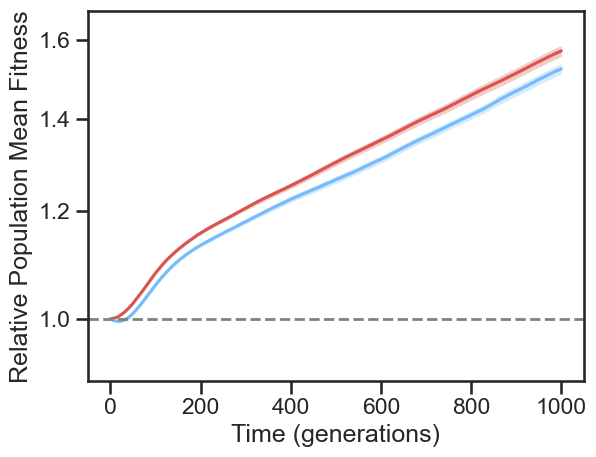

In [59]:
w1 = nodel_data['pro_fitness_mean'] / nodel_data['pro_fitness_mean'][0]
w2 = del_data['pro_fitness_mean'] / del_data['pro_fitness_mean'][0]
w1ci = tq * (nodel_data['pro_fitness_std'] / nodel_data['pro_fitness_mean'][0]) / np.sqrt(nReps)
w2ci = tq * (del_data['pro_fitness_std'] / del_data['pro_fitness_mean'][0]) / np.sqrt(nReps) 
plt.semilogy(nodel_data['generation'], w1, color=red)
plt.fill_between(nodel_data['generation'], w1 - w1ci, w1 + w1ci, alpha=.3, color=red, lw=.001)
plt.plot(del_data['generation'], w2, color=blu)
plt.fill_between(del_data['generation'], w2 - w2ci, w2 + w2ci, alpha=.3, color=blu, lw=.001)
plt.axhline(y=1, xmin=0, xmax=10, color='grey', lw=2, ls='dashed')
plt.yticks(ticks=np.arange(1, 1.61, .2), labels=np.arange(1, 1.61, .2).round(2))
plt.ylim(.9, 1.68)
plt.minorticks_off()
plt.ylabel('Relative Population Mean Fitness')
plt.xlabel('Time (generations)');